In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import load_model
from tensorflow import math

In [3]:
fraud_df = pd.read_csv("../../Data/creditcard.csv")
fraud_df.drop(columns='Time', inplace=True)

In [4]:
y_set = fraud_df['Class']
X_set = fraud_df.drop(columns='Class')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, random_state=1)

In [6]:
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [45]:
model = Sequential()
model.add(Dense(units=87, activation='relu', input_dim=29))
model.add(Dense(units=2, activation='softmax'))

In [46]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 213605 samples
Epoch 1/100
213605/213605 - 16s - loss: 0.0082 - accuracy: 0.9986
Epoch 2/100
213605/213605 - 13s - loss: 0.0046 - accuracy: 0.9991
Epoch 3/100
213605/213605 - 16s - loss: 0.0042 - accuracy: 0.9992
Epoch 4/100
213605/213605 - 16s - loss: 0.0039 - accuracy: 0.9992
Epoch 5/100


In [9]:
fraud_model = load_model("firstmodel.h5")

In [20]:
predictions = fraud_model.predict(X_test_scaled);

In [39]:
predictions

array([[9.9996459e-01, 3.5422094e-05],
       [9.9995708e-01, 4.2900043e-05],
       [9.9995244e-01, 4.7614489e-05],
       ...,
       [9.9934787e-01, 6.5215334e-04],
       [9.9996066e-01, 3.9386359e-05],
       [9.9998403e-01, 1.6004182e-05]], dtype=float32)

In [10]:
model_loss, model_accuracy = fraud_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

71202/71202 - 2s - loss: 0.0030 - accuracy: 0.9994
Loss: 0.003049690093501756, Accuracy: 0.9994382262229919


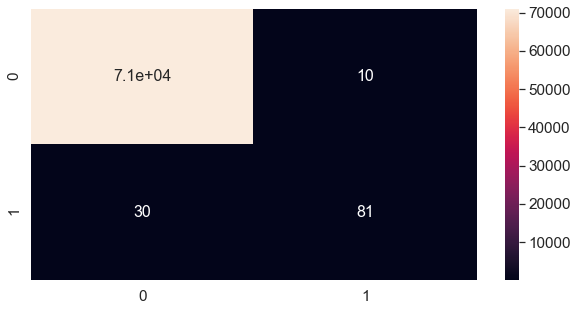

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test_categorical.argmax(axis=1),fraud_model.predict(X_test_scaled).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(2),
                    range(2))
plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [11]:
cm

array([[71081,    10],
       [   30,    81]], dtype=int64)

In [47]:
y_train.value_counts()

0    213224
1       381
Name: Class, dtype: int64

In [48]:
213224/(213224+381)

0.9982163338873153

In [42]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(fraud_model, X_test_scaled, y_test_categorical)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

ValueError: plot_confusion_matrix only supports classifiers